In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
def label_encoded(feat):
    le = LabelEncoder()
    le.fit(feat)
    print(feat.name,le.classes_)
#     print(le.classes_)
    return le.transform(feat)

In [32]:
h_names=['class', 'cap-shape', 'Cap-surface','cap-color', 'bruises', 'odor','gill-attachment', 'gill-spacing', 'gill-size','gill-color', 'stalk-shape', 'stalk-surface-above-ring','stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']

dataset = pd.read_csv("mushrooms_data.txt",names = h_names) #Worked only with CSV for me.
dataset.head()


,class,cap-shape,Cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [34]:
for col in dataset.columns:
    dataset[str(col)] = label_encoded(dataset[str(col)])

class ['e' 'p']
cap-shape ['b' 'c' 'f' 'k' 's' 'x']
Cap-surface ['f' 'g' 's' 'y']
cap-color ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
bruises ['f' 't']
odor ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
gill-attachment ['a' 'f']
gill-spacing ['c' 'w']
gill-size ['b' 'n']
gill-color ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
stalk-shape ['e' 't']
stalk-surface-above-ring ['f' 'k' 's']
stalk-surface-below-ring ['f' 'k' 's' 'y']
stalk-color-above-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w']
stalk-color-below ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
veil-type ['p']
veil-color ['n' 'o' 'w']
ring-number ['n' 'o' 't']
ring-type ['e' 'f' 'l' 'n' 'p']
spore-print-color ['h' 'k' 'n' 'o' 'r' 'u' 'w' 'y']
population ['a' 'c' 'n' 's' 'v' 'y']
habitat ['d' 'g' 'l' 'm' 'p' 'u' 'w']


In [45]:
X = dataset.drop(['odor'],axis=1)
y = dataset['odor']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.4,random_state=42)

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model_1 = RandomForestClassifier(max_depth=10, random_state=10)
model_1.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=10)

In [48]:
y_pred = model_1.predict(X_test)


In [49]:
accuracy_score(y_test,y_pred)


0.8173076923076923

In [51]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Random Forest Classifier Accuracy Value: {:.2f}".format(accuracy))

Random Forest Classifier Accuracy Value: 0.82


In [52]:
print('Confusion matrix Accuracy is: {}'.format(metrics.accuracy_score(y_test, y_pred)))

Confusion matrix Accuracy is: 0.8173076923076923


[[  51    0    0  125    0    0    0    0    0]
 [   0   76    0    0    0    0    0    0    0]
 [   0    0  618    0    0    0    0   37   43]
 [ 118    0    0   50    0    0    0    0    0]
 [   0    0    0    0    0    1    0    0    0]
 [   0    0    0    0    0 1196    0    0    0]
 [   0    0    0    0    0    0  110    0    0]
 [   0    0   38    0    0    0    0    9   37]
 [   0    0   46    0    0    0    0   30   15]]


<AxesSubplot:>

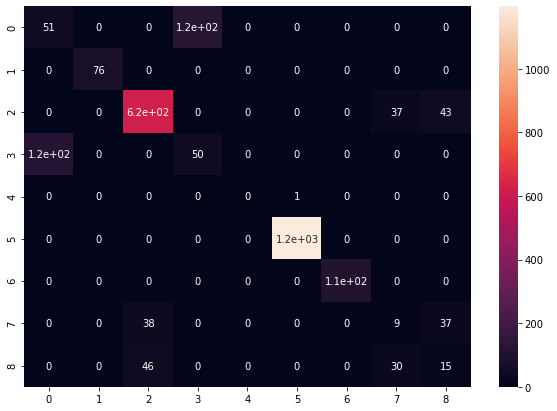

In [83]:


from sklearn.metrics import accuracy_score,recall_score,confusion_matrix
y_pred = model_1.predict(X_test)
z = confusion_matrix(y_test,y_pred)
print(z)

df_cm = pd.DataFrame(z)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

<class 'sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay'>


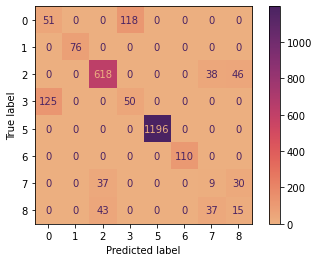

In [89]:
from sklearn import metrics
cm =metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_pred,y_test,labels=model_1.classes_),
                              display_labels=model_1.classes_)
df_cm1 = pd.DataFrame(z)

cm.plot(cmap="flare")

print(type(cm))